<a href="https://colab.research.google.com/github/SrijanxxxSharma/clustering/blob/main/Customes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering 
In simple words it is grouping of similar kind of data. On the basis of groups we can label the data. This prevents cost of labeling the data by an expert.

But clustering is very unpredictable and uncertain as well.

# Data
We are using customer dataset here. Using this dataset we will see types of customers to boost one's business.

https://github.com/SrijanxxxSharma/clustering/blob/main/customers.csv

In [35]:
# Lets view our dataset.
import pandas as pd
url="https://raw.githubusercontent.com/SrijanxxxSharma/clustering/main/customers.csv"
dataset = pd.read_csv(url)
print(dataset.head())
print(dataset.shape)

   Channel  Region  Fresh  ...  Frozen  Detergents_Paper  Delicatessen
0        2       3  12669  ...     214              2674          1338
1        2       3   7057  ...    1762              3293          1776
2        2       3   6353  ...    2405              3516          7844
3        1       3  13265  ...    6404               507          1788
4        2       3  22615  ...    3915              1777          5185

[5 rows x 8 columns]
(440, 8)


# Preprocessing of columns
 We are humans and we like to make thing easy. To do that we use preprocessing to scale down our data in range of hundred.

In [36]:
 import numpy as np

# clm=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
# arr=list()
# arr=[dataset[x].values for x in clm]
# scale=100
# i=0
# for feature in arr:
#   min=np.min(feature)
#   max=np.max(feature)
#   new=scale*((feature-min)/(max-min))
#   dataset[clm[i]]=new
#   i+=1
#   del new

class Preprocess:
  def __init__(self,scale=1):
    self.scale=scale
    self.min=list()
    self.max=list()
    self.mean=list()
    self.std=list()
    self.col_name=None
    self.flag=False

  def fit(self,dataset,col_name,stand_scaler=False):
    self.col_name=col_name
    arr=list()
    arr=[dataset[x].values for x in col_name]
    for feature in arr:
      if not stand_scaler:
        self.min.append(np.min(feature))
        self.max.append(np.max(feature))
      else:
        self.flag=True
        self.mean.append(np.mean(feature))
        self.std.append(np.std(feature))

  def transform(self,dataset):
    arr=list()
    arr=[dataset[x].values for x in self.col_name]
    if not self.flag:
      i=0
      for feature in arr:
        new=self.scale*((feature-self.min[i])/(self.max[i]-self.min[i]))
        dataset[self.col_name[i]]=new
        i+=1
        del new
    else:
      i=0
      for feature in arr:
        new=self.scale*((feature-self.mean[i])/self.std[i])
        dataset[self.col_name[i]]=new
        i+=1
        del new

obj=Preprocess(scale=100)
obj.fit(dataset,col_name=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],stand_scaler=True)
obj.transform(dataset)
dataset.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,5.293319,52.356777,-4.111489,-58.936716,-4.356873,-6.633906
1,2,3,-39.130197,54.445767,17.031835,-27.013618,8.640684,8.915105
2,2,3,-44.702926,40.853771,-2.815710,-13.753572,13.323164,224.329255
3,1,3,10.011141,-62.401993,-39.297690,68.714430,-49.858822,9.341105
4,2,3,84.023948,-5.239645,-7.935618,17.385884,-23.191782,129.934689


# Visualization 
Lets see our data in graphs. This gives us some insight of it.

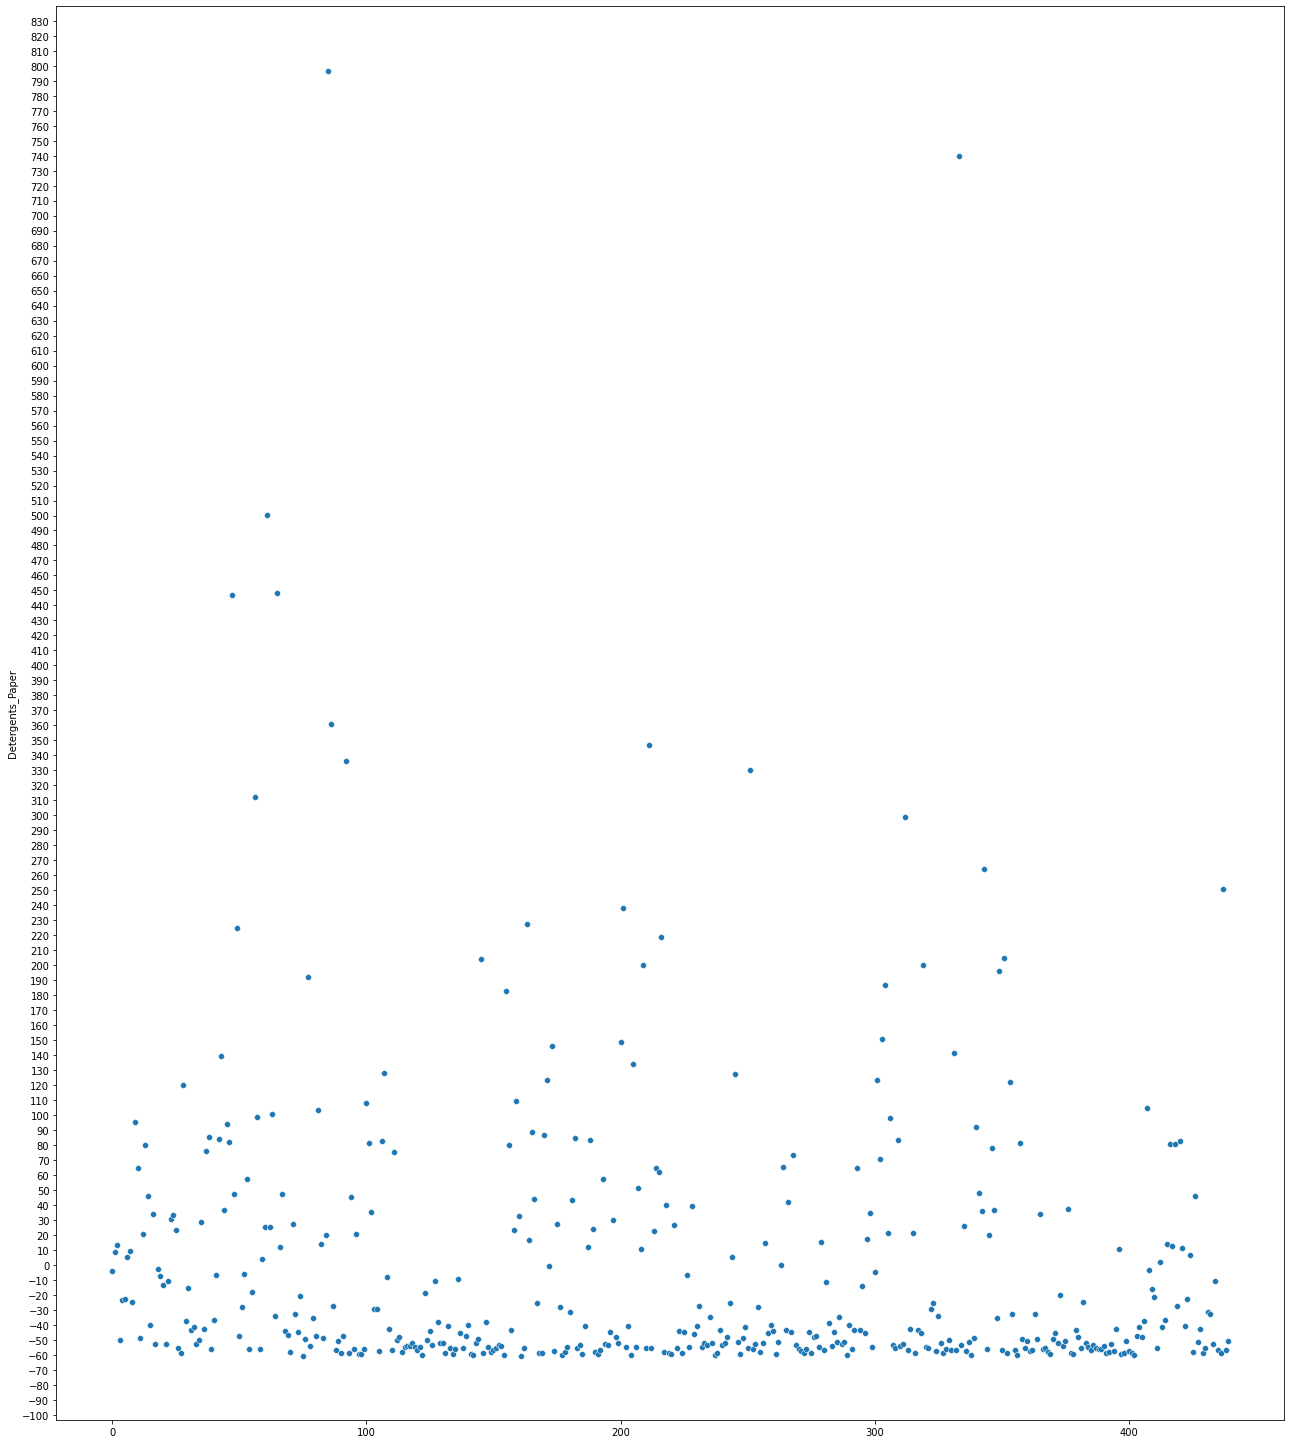

In [37]:
# Setup for visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(22,26))

x=[n for n in range(0,440)]
ax =sns.scatterplot(x=x, y=dataset.Detergents_Paper) # Go ahead and try for more features
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

## All features are quite same a lot spending is not observed 
## Detergents_Paper shows good market with more spending.

# Clustering Algorithms 
### 1. DBSCAN( Density based spatial clustering of applications with noise)
### 2. k-mean
### 3. Agglomerative 

# DBSCAN
DBSCAN is used generally when we don't know about number of clusters a dataset can form.
DBSCAN uses two concepts-

i) There should be atleast min_samples number of points to call it a cluster.

ii) For every point we define a distance(eps) which act as distance till which points are counted, that is, it specifies region.

if these conditions are not satisfied then points are declared as noise

Random guess for conditions:

min_samples=[25,21,18,15,13,10,5]


eps=[1,2,3,4,5,6,7,9,10,11,12,13,13,15,16,17]

In [38]:
from sklearn.cluster import DBSCAN
import numpy as np

list_min_samples=[25,21,18,15,13,10,5]
list_eps=[1,2,3,4,5,6,7,9,10,11,12,13,13,15,16,17]
for min_samples in list_min_samples:
  print("\nMin Samples:{}".format(min_samples))
  for eps in list_eps: 
    print("\neps:{}".format(eps))
    model=DBSCAN(eps=eps, min_samples=min_samples)
    clusters=model.fit_predict(dataset)
    if len(np.unique(clusters))>=3 and len(np.unique(clusters))<=5: 
      print("\neps:{}".format(eps))
      print("Unique Members:\n{}".format(np.unique(clusters)))
      print("Data points under each members:\n{}".format(np.bincount(clusters+1)))


# we were unable to get a result from dbscan as it clusters data as a group only. If we try to make more groups we observe lot of noise


Min Samples:25

eps:1

eps:2

eps:3

eps:4

eps:5

eps:6

eps:7

eps:9

eps:10

eps:11

eps:12

eps:13

eps:13

eps:15

eps:16

eps:17

Min Samples:21

eps:1

eps:2

eps:3

eps:4

eps:5

eps:6

eps:7

eps:9

eps:10

eps:11

eps:12

eps:13

eps:13

eps:15

eps:16

eps:17

Min Samples:18

eps:1

eps:2

eps:3

eps:4

eps:5

eps:6

eps:7

eps:9

eps:10

eps:11

eps:12

eps:13

eps:13

eps:15

eps:16

eps:17

Min Samples:15

eps:1

eps:2

eps:3

eps:4

eps:5

eps:6

eps:7

eps:9

eps:10

eps:11

eps:12

eps:13

eps:13

eps:15

eps:16

eps:17

Min Samples:13

eps:1

eps:2

eps:3

eps:4

eps:5

eps:6

eps:7

eps:9

eps:10

eps:11

eps:12

eps:13

eps:13

eps:15

eps:16

eps:17

Min Samples:10

eps:1

eps:2

eps:3

eps:4

eps:5

eps:6

eps:7

eps:9

eps:10

eps:11

eps:12

eps:13

eps:13

eps:15

eps:16

eps:17

Min Samples:5

eps:1

eps:2

eps:3

eps:4

eps:5

eps:6

eps:7

eps:9

eps:10

eps:11

eps:12

eps:13

eps:13

eps:15

eps:16

eps:16
Unique Members:
[-1  0  1]
Data points under each

# K-Mean
K-mean starts with fixed numbers of clusters. It randomly decides cluster centers initially and then according to distance from each points it decides cluster centers for them. This continues till we have exactly same clusters.

In [39]:
from sklearn.cluster import KMeans
import numpy as np

samples=list()
clusters=[2,3,4]
for cluster in clusters:
  model=KMeans(n_clusters=cluster)
  model.fit(dataset)
  samples.append(model.labels_)
i=0
for sample in samples:
  i+=1
  print("for sample {}".format(i))
  print("Members in each classes:\n{}".format(np.bincount(sample)))

# Same is shown by kmeans as it give more data points to one class than others

for sample 1
Members in each classes:
[ 53 387]
for sample 2
Members in each classes:
[109 318  13]
for sample 3
Members in each classes:
[  2 110  12 316]


# Agglomerative
It is hierarchical clustering and merges two closest groups together until all points gets a group.


In [40]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

samples=list()
clusters=[2,3,4]
for cluster in clusters:
  model=AgglomerativeClustering(n_clusters=cluster)
  samples.append(model.fit_predict(dataset))
i=0
for sample in samples:
  i+=1
  print("for sample {}".format(i))
  print("Members in each classes:\n{}".format(np.bincount(sample)))

# Same is shown by Agglomerative as it gives more data points to one class than others.


for sample 1
Members in each classes:
[434   6]
for sample 2
Members in each classes:
[  6 281 153]
for sample 3
Members in each classes:
[281   5 153   1]


# Conclusion
On the basis of DBSCAN, dataset shows the customes are of similar type as they show one cluster only.That is most members spend less money(shown via visualization).